<a href="https://colab.research.google.com/github/nopal72/klasifikasi-gaya-belajar/blob/XGBOOST/XGBOOST_%2B_SMOTE__klasifikasi_gaya_belajar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
import pickle
import matplotlib.pyplot as plt
from google.colab import drive
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/dataset/my_csv.csv'

df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.head()

,Gender,Age,I learn better by reading what the teacher writes on the chalkboard.,"When I read instructions, I remember them better.",I understand better when I read instructions.,I learn better by reading than by listening to someone.,I learn more by reading textbooks than by listening to lectures.,When the teacher tells me the instructions I understand better,"When someone tells me how to do something in class, I learn it better.",I remember things I have heard in class better than things I have read.,I learn better in class when the teacher gives a lecture.,I learn better in class when I listen to someone.,I prefer to learn by doing something in class.,"When I do things in class, I learn better.",I enjoy learning in class by doing experiments.,I understand things better in class when I participate in role-playing.,I understand things better in class when I participate in role-playing..1,Learner
0,Male,16,3,3,4,3,2,4,3,3,2,3,4,2,2,3,3,K
1,Male,16,5,4,4,4,3,3,2,4,3,4,3,4,3,4,4,A
2,Male,18,3,4,3,3,4,2,4,3,2,2,3,2,3,3,3,A
3,Male,21,1,3,3,4,4,2,2,2,2,2,4,4,4,4,5,K
4,Female,21,4,4,4,5,5,4,4,3,4,4,5,5,5,3,3,A


In [ ]:
df.shape

(1210, 18)

In [ ]:
df.columns

Index(['Gender', 'Age',
       'I learn better by reading what the teacher writes on the chalkboard.',
       'When I read instructions, I remember them better.',
       'I understand better when I read instructions.',
       'I learn better by reading than by listening to someone.',
       'I learn more by reading textbooks than by listening to lectures.',
       'When the teacher tells me the instructions I understand better',
       'When someone tells me how to do something in class, I learn it better.',
       'I remember things I have heard in class better than things I have read.',
       'I learn better in class when the teacher gives a lecture.',
       'I learn better in class when I listen to someone.',
       'I prefer to learn by doing something in class.',
       'When I do things in class, I learn better.',
       'I enjoy learning in class by doing experiments.',
       'I understand things better in class when I participate in role-playing.',
       'I understand thing

#Merubah Nama Kolum

In [ ]:
col_names = ['Gender', 'Age', 'a1', 'a2','a3','a4','a5','v1','v2','v3','v4','v5','k1','k2','k3','k4','k5','learner']

df.columns = col_names
col_names

['Gender',
 'Age',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'k1',
 'k2',
 'k3',
 'k4',
 'k5',
 'learner']

#Lihat Info Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Gender   1210 non-null   object
 1   Age      1210 non-null   int64 
 2   a1       1210 non-null   int64 
 3   a2       1210 non-null   int64 
 4   a3       1210 non-null   int64 
 5   a4       1210 non-null   int64 
 6   a5       1210 non-null   int64 
 7   v1       1210 non-null   int64 
 8   v2       1210 non-null   int64 
 9   v3       1210 non-null   int64 
 10  v4       1210 non-null   int64 
 11  v5       1210 non-null   int64 
 12  k1       1210 non-null   int64 
 13  k2       1210 non-null   int64 
 14  k3       1210 non-null   int64 
 15  k4       1210 non-null   int64 
 16  k5       1210 non-null   int64 
 17  learner  1210 non-null   object
dtypes: int64(16), object(2)
memory usage: 170.3+ KB


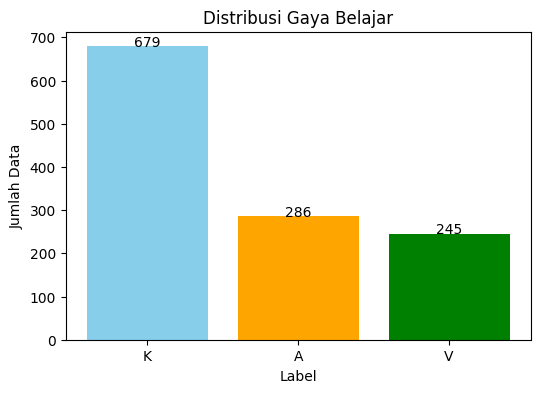

In [ ]:
# Hitung jumlah data per label
label_counts = df['learner'].value_counts()

# --- Diagram Batang dengan jumlah data ---
plt.figure(figsize=(6,4))
bars = plt.bar(label_counts.index, label_counts.values, color=['skyblue', 'orange', 'green'])
plt.title('Distribusi Gaya Belajar')
plt.xlabel('Label')
plt.ylabel('Jumlah Data')

# Tambahkan jumlah di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', fontsize=10)

plt.show()

In [ ]:
df.drop(['Gender','Age'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
a1,0
a2,0
a3,0
a4,0
a5,0
v1,0
v2,0
v3,0
v4,0
v5,0


In [ ]:
x = df.drop('learner', axis=1)
y = df['learner']

In [ ]:
from sklearn.preprocessing import LabelEncoder


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train_enc)


Distribusi sesudah SMOTE:
0    540
1    540
2    540
Name: count, dtype: int64


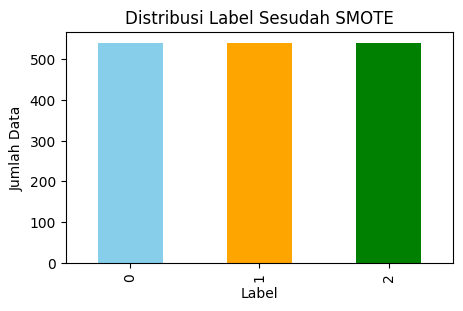

In [ ]:
# Lihat distribusi sesudah SMOTE
print("\nDistribusi sesudah SMOTE:")
print(pd.Series(y_train_res).value_counts())

# Visualisasi sesudah SMOTE
plt.figure(figsize=(5,3))
pd.Series(y_train_res).value_counts().plot(kind='bar', color=['skyblue','orange','green'])
plt.title("Distribusi Label Sesudah SMOTE")
plt.xlabel("Label")
plt.ylabel("Jumlah Data")
plt.show()

In [ ]:
print(x_train_res.shape)
print(y_train_res.shape)
print(x_test.shape)
print(y_test.shape)

(1620, 15)
(1620,)
(242, 15)
(242,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import numpy as np

# Parameter grid (dibuat kecil biar proses cepat)
param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.05, 0.1]
}

# Model dasar
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_res)),
    eval_metric='mlogloss',
    random_state=0
)

# GridSearch
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Jalankan tuning
grid_search.fit(x_train_res, y_train_res)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# Gunakan model terbaik
best_model = grid_search.best_estimator_

# Evaluasi
accuracy_train = best_model.score(x_train_res, y_train_res)
accuracy_test = best_model.score(x_test, y_test_enc)

print('Akurasi data training:', np.round(accuracy_train * 100, 2))
print('Akurasi data testing:', np.round(accuracy_test * 100, 2))


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 700, 'subsample': 0.8}
Best CV score: 0.9475409836065574
Akurasi data training: 100.0
Akurasi data testing: 90.91


In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import numpy as np

# Model XGBoost
model = XGBClassifier(
    n_estimators=600,
    random_state=0,
    max_depth=1,
    min_child_weight=0,
    gamma=0.1,
    objective='multi:softprob',
    num_class=len(np.unique(y_train_res))
)
model.fit(x_train_res, y_train_res)

# Prediksi
y_pred = model.predict(x_test)

# Evaluasi
accuracy_train = model.score(x_train_res, y_train_res)
accuracy_test = model.score(x_test, y_test_enc)

print('Akurasi data training:', np.round(accuracy_train * 100, 2))
print('Akurasi data testing:', np.round(accuracy_test * 100, 2))


Akurasi data training: 95.41
Akurasi data testing: 93.39


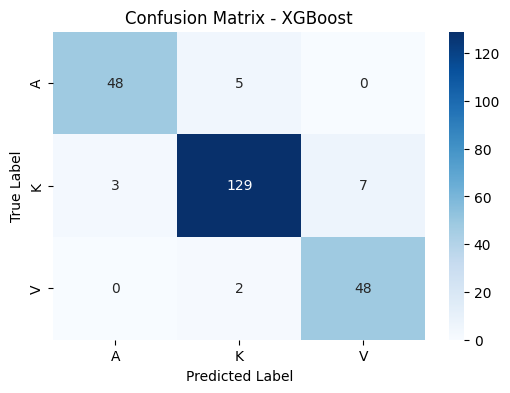

              precision    recall  f1-score   support

           A       0.94      0.91      0.92        53
           K       0.95      0.93      0.94       139
           V       0.87      0.96      0.91        50

    accuracy                           0.93       242
   macro avg       0.92      0.93      0.93       242
weighted avg       0.93      0.93      0.93       242



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Classification Report
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

<Figure size 800x600 with 0 Axes>

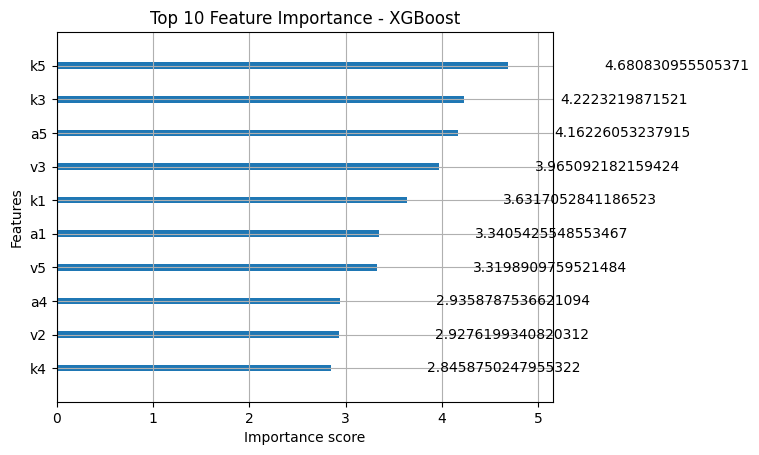

In [ ]:
from xgboost import plot_importance

plt.figure(figsize=(8,6))
plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importance - XGBoost")
plt.show()


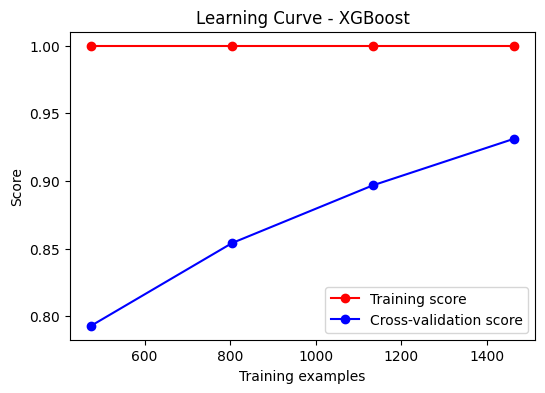

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, x_train_res, y_train_res, cv=5, scoring='accuracy', n_jobs=-1
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve - XGBoost")
plt.legend(loc="best")
plt.show()


In [ ]:
feature_scores = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

,0
k5,0.109040
k3,0.108231
v3,0.080863
k1,0.079407
v5,0.070684
k4,0.069525
v4,0.068277
v2,0.060433
a1,0.060185
v1,0.059593


In [ ]:
accuracy_train = model.score(x_train, y_train)
accuracy_test = model.score(x_test, y_test)

print('Akurasi data training: ', accuracy_train)
print('Akurasi data testing: ', np.round(accuracy_test * 100))

Akurasi data training:  0.0
Akurasi data testing:  0.0


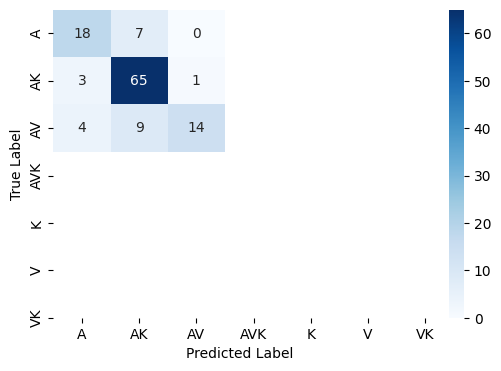

In [ ]:
confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt=".0f", ax=ax, cmap="Blues", xticklabels=['A','AK','AV','AVK','K','V','VK'], yticklabels=['A','AK','AV','AVK','K','V','VK'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Pastikan y_test sudah di-encode, dan y_pred hasil prediksi model
print(classification_report(
    y_test_enc,                # label asli test (encoded)
    y_pred,                     # hasil prediksi
    target_names=le.classes_    # nama kelas asli dari LabelEncoder
))


              precision    recall  f1-score   support

           A       0.78      0.84      0.81        25
           K       0.93      0.90      0.91        69
           V       0.89      0.89      0.89        27

    accuracy                           0.88       121
   macro avg       0.86      0.88      0.87       121
weighted avg       0.89      0.88      0.89       121

